In [1]:
import pandas as pd

wiki = pd.read_csv("C:/Users/Daniel/Documents/maestria UVG/text mining y analisis de sentimiento/tarea1/tarea1/base.csv")
base = wiki[['Title','Corpus']]
base.head()

,Title,Corpus
0,DJ AM,"\n,\n,Adam Michael Goldstein (March 30, 1973 –..."
1,"Princess Louise, Duchess of Argyll","\n,Princess Louise, Duchess of Argyll, VA, CI,..."
2,Elias Ashmole,"\n\n,Elias Ashmole FRS (/ɪlaɪʌs æʃmoʊl/; 23 Ma..."
3,"Albert Stanley, 1st Baron Ashfield","\n\n,Albert Henry Stanley, 1st Baron Ashfield,..."
4,Harriet Arbuthnot,"\n\n,Harriet Arbuthnot (10 September 1793 – 2 ..."


In [2]:
import re as re

new_corpus = list()
for text in base['Corpus']:
    new_corpus.append(
        re.split('\W+',
                 re.sub('\r+|\n+|,|\s{2,}|\t|\[\d+\]','',text.lower())
                )
    )
base_clean = pd.DataFrame(data={'Title':base['Title'],'Corpus':new_corpus})
base_clean.head()

,Title,Corpus
0,DJ AM,"[adam, michael, goldstein, march, 30, 1973, au..."
1,"Princess Louise, Duchess of Argyll","[princess, louise, duchess, of, argyll, va, ci..."
2,Elias Ashmole,"[elias, ashmole, frs, ɪlaɪʌs, æʃmoʊl, 23, may,..."
3,"Albert Stanley, 1st Baron Ashfield","[albert, henry, stanley, 1st, baron, ashfield,..."
4,Harriet Arbuthnot,"[harriet, arbuthnot, 10, september, 1793, 2, a..."


In [3]:
vocabulary=list()
tokens=list()
for i in base_clean['Corpus']:
    tokens.append(len(i))
    vocabulary.append(len(set(i)))
base_clean['Tokens'] = tokens
base_clean['Vocabulary'] = vocabulary

In [4]:
base_clean.head(25)

,Title,Corpus,Tokens,Vocabulary
0,DJ AM,"[adam, michael, goldstein, march, 30, 1973, au...",2965,1017
1,"Princess Louise, Duchess of Argyll","[princess, louise, duchess, of, argyll, va, ci...",5949,1735
2,Elias Ashmole,"[elias, ashmole, frs, ɪlaɪʌs, æʃmoʊl, 23, may,...",2987,1062
3,"Albert Stanley, 1st Baron Ashfield","[albert, henry, stanley, 1st, baron, ashfield,...",2819,991
4,Harriet Arbuthnot,"[harriet, arbuthnot, 10, september, 1793, 2, a...",2233,812
5,Archimedes,"[archimedes, of, syracuse, ˌɑːrkɪˈmiːdiːz, anc...",4923,1470
6,Carlos Castillo Armas,"[carlos, castillo, armas, locally, kaɾlos, kas...",5205,1459
7,Yasser Arafat,"[mohammed, yasser, abdel, rahman, abdel, raouf...",9859,2490
8,Marshall Applewhite,"[marshall, herff, applewhite, jr, may, 17, 193...",5651,1645
9,Anthony Roll,"[the, anthony, roll, is, a, paper, record, of,...",3290,1053


Definimos una funcion limit para apoyarnos en crear sub datasets en base a rangos

In [5]:
def limit(df,ini,fin):
    chosen=list()
    a = df.Tokens>ini
    b = df.Tokens<fin
    for i in range(0,len(df)):
            chosen.append(a[i]&b[i])
    return chosen

Exploramos el crecimiento de vocabularios conforme crece la cantidad de tokens. 
* Tokens entre 100 y 2500
* Tokens entre 2500 y 7000
* Tokens entre 7000 y 25000

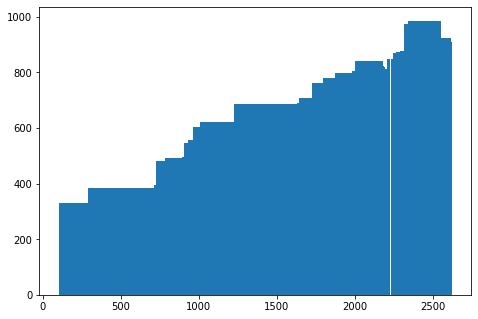

In [78]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
filters = limit(base_clean,100,2500)
tokens = base_clean[filters]['Tokens']
vocabulary = base_clean[filters]['Vocabulary']
ax.bar(tokens,vocabulary)
plt.show()

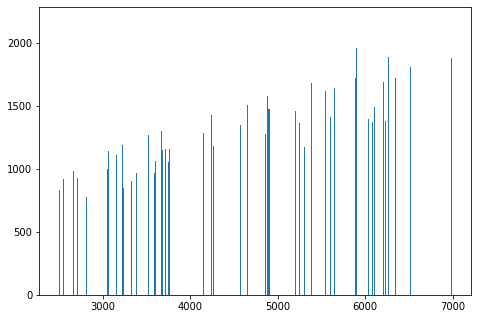

In [80]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
filters = limit(base_clean,2500,7000)
tokens = base_clean[filters]['Tokens']
vocabulary = base_clean[filters]['Vocabulary']
ax.bar(tokens,vocabulary)
plt.show()

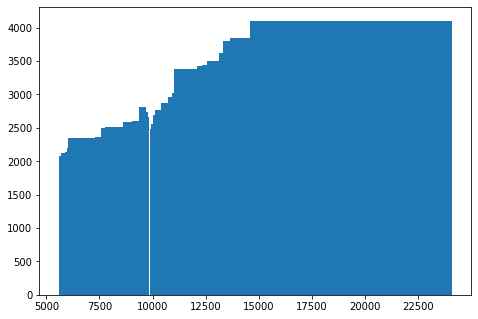

In [81]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
filters = limit(base_clean,7000,25000)
tokens = base_clean[filters]['Tokens']
vocabulary = base_clean[filters]['Vocabulary']
ax.bar(tokens,vocabulary)
plt.show()

A continuacion, creamos los dataset de más de 100k de tokens, combinando articulos.

In [59]:
def getVocabulary(df,ini,fin):
    acc = []
    for i in range(ini,fin):
        acc+=df[i]
    return(len(set(acc)))

cienk={'Tokens':sum(base_clean[0:20].Tokens),'Vocabulary':getVocabulary(base_clean.Corpus,0,20)}
docientosk={'Tokens':sum(base_clean[0:43].Tokens),'Vocabulary':getVocabulary(base_clean.Corpus,0,43)}
trecientosk={'Tokens':sum(base_clean[0:63].Tokens),'Vocabulary':getVocabulary(base_clean.Corpus,0,63)}
cuatrocientosk={'Tokens':sum(base_clean[0:87].Tokens),'Vocabulary':getVocabulary(base_clean.Corpus,0,87)}
quinientosk={'Tokens':sum(base_clean[0:105].Tokens),'Vocabulary':getVocabulary(base_clean.Corpus,0,105)}
seicientosk={'Tokens':sum(base_clean[0:123].Tokens),'Vocabulary':getVocabulary(base_clean.Corpus,0,123)}
setecientosk={'Tokens':sum(base_clean[0:145].Tokens),'Vocabulary':getVocabulary(base_clean.Corpus,0,145)}
ochocientosk={'Tokens':sum(base_clean[0:162].Tokens),'Vocabulary':getVocabulary(base_clean.Corpus,0,162)}
novecientosk={'Tokens':sum(base_clean[0:179].Tokens),'Vocabulary':getVocabulary(base_clean.Corpus,0,179)}
unM={'Tokens':sum(base_clean[0:201].Tokens),'Vocabulary':getVocabulary(base_clean.Corpus,0,201)}
fuente = [cienk,docientosk,trecientosk,cuatrocientosk,quinientosk,seicientosk,setecientosk,ochocientosk,novecientosk,unM]
new_base = pd.DataFrame(fuente)
new_base


,Tokens,Vocabulary
0,100294,12426
1,200667,18999
2,306575,23749
3,406845,27133
4,506047,29840
5,600203,30885
6,706332,34895
7,800857,37597
8,900910,39735
9,1001785,41829


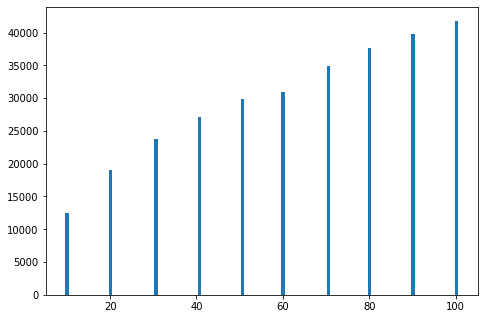

In [75]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tokens = new_base['Tokens']
vocabulary = new_base['Vocabulary']
ax.bar(tokens/10000,vocabulary)
plt.show()

En la gráfica anterior podemos ver conforme a se aumentan los tokens (palabras de articulos de wikipedia), el vocabulario crece. Sospecho que en este caso, la razón es que no se excluyeron numeros, fechas, etc. y nombres propios. pero si es obserbable conforme aumenta los tokens, el vocabulario crece cada vez más lento.

Los datos han sido escalados en un factor de 10,000 para evitar problemas de escala con la libreria.